## PROJECT TITLE: CUSTOMER TRANSACTIONS

#### Data Analysis by: Kwabena Boateng

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from datetime import datetime

from sklearn.preprocessing import LabelEncoder 

### LOAD DATASET

In [2]:
customer_transactions = pd.read_csv("C:/Users/KWABENABOATENG/Desktop/DATA ANALYSIS/PERSONAL/CUSTOMER TRANSACTIONS PROJECT/sample_dataset.csv")

customer_transactions

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics
...,...,...,...,...,...,...,...,...,...
49995,891845,Christine,Leach,F,1997-10-21,108.74,2023-08-30,Alexander Ltd,Market
49996,800560,Anna,Allen,F,1999-10-21,133.66,2023-05-03,Knapp-Calhoun,Cosmetic
49997,133285,Nicole,Franklin,M,1979-10-26,464.29,2023-02-12,"Cantrell, Haynes and Ballard",Market
49998,616122,Maria,Keller,M,1981-10-25,472.57,2023-03-25,"Wilson, Jackson and Beard",Market


### DATA UNDERSTANDING

The dataset used for this project is stored in the data/ directory. The data consists of customer transaction records with the following columns:

* customer_id: Unique identifier for each customer.
* Name: First name of the customer.
* Surname: Last name of the customer.
* Gender: the sexual orientation of the customer.
* Birthdate: the day, month and year the customer was born.
* Transaction Amount: Amount of transaction made.
* Date: Date of the transaction.
* Merchant Name: the name of the merchant making the transactions.
* Category: Product category.

### DATA PREPARATION

#### CHECK NUMBER OF COLUMNS AND ROWS IN THE DATASET.

In [3]:
print('The number of rows and columns in this dataset is', customer_transactions.shape, 'respectively')

The number of rows and columns in this dataset is (50000, 9) respectively


#### CHECK THE STRUCTURE OF THE DATASET

In [4]:
#Show all the names of the columns in this dataset.

customer_transactions.columns

Index(['Customer ID', 'Name', 'Surname', 'Gender', 'Birthdate',
       'Transaction Amount', 'Date', 'Merchant Name', 'Category'],
      dtype='object')

In [5]:
#Rename columns title.
customer_transactions = customer_transactions.rename(columns={'Name': 'First Name', 'Surname': 'Last Name', 'Birthdate': 'Date of Birth'})

In [6]:
#top first (5)records of the dataset.

customer_transactions.head()

,Customer ID,First Name,Last Name,Gender,Date of Birth,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics


In [7]:
customer_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         50000 non-null  int64  
 1   First Name          50000 non-null  object 
 2   Last Name           50000 non-null  object 
 3   Gender              44953 non-null  object 
 4   Date of Birth       50000 non-null  object 
 5   Transaction Amount  50000 non-null  float64
 6   Date                50000 non-null  object 
 7   Merchant Name       50000 non-null  object 
 8   Category            50000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


#### CHECK FOR MISSING VALUES

In [8]:
customer_transactions.isna().sum()

Customer ID              0
First Name               0
Last Name                0
Gender                5047
Date of Birth            0
Transaction Amount       0
Date                     0
Merchant Name            0
Category                 0
dtype: int64

In [9]:
Total_MV = customer_transactions.isna().sum().sum()
print('The total number of missing values in this dataset is', Total_MV)

The total number of missing values in this dataset is 5047


In [10]:
#Check for the percentage for the missing values.

missing_gender = customer_transactions['Gender'].isnull().sum()
total_rows = len(customer_transactions)
missing_percentage = (missing_gender / total_rows) * 100

print(f"Missing Gender Values: {missing_gender} ({missing_percentage:.2f}%)")

Missing Gender Values: 5047 (10.09%)


#### INSIGHTS

The results showed that there are 5,047 missing values in the Gender column of the dataset. The percentage of the missing value sums up to 10.09% which is quite a huge percentage.


In dealing with this, I will replace all the missing values in the gender column to UNDEFINED.

This will presuppose that the sexual and gender orientation was not available for them to select, hence they left that field empty.

#### DEALING WITH THE MISSING VALUES IN THE GENDER COLUMN

In [11]:
#Checking for the unique values in the Gender column.

customer_transactions['Gender'].unique()

array(['F', nan, 'M'], dtype=object)

In [12]:
#Checking for the count of the unique values in the Gender column.

customer_transactions['Gender'].value_counts()

Gender
F    22713
M    22240
Name: count, dtype: int64

In [13]:
#Replace missing values in the gender column with undefined.

customer_transactions['Gender'].fillna('Undefined', inplace=True)

In [14]:
#Replace gender initials with the full word.

customer_transactions['Gender'] = customer_transactions['Gender'].replace('M', 'Male')
customer_transactions['Gender'] = customer_transactions['Gender'].replace('F', 'Female')

In [15]:
#Checking for the unique values in the Gender column after replacing the missing values and renaming the initials with full word.
customer_transactions['Gender'].unique()

array(['Female', 'Undefined', 'Male'], dtype=object)

#### CHECKING THE CATEGORY COLUMNS

In [16]:
customer_transactions['Category'].unique()

array(['Cosmetic', 'Travel', 'Clothing', 'Electronics', 'Restaurant',
       'Market'], dtype=object)

In [17]:
customer_transactions['Category'].value_counts()

Category
Restaurant     8413
Market         8382
Travel         8377
Electronics    8324
Clothing       8261
Cosmetic       8243
Name: count, dtype: int64

#### CHECK FOR DUPLICATE ROWS

In [18]:
Total_dup = customer_transactions.duplicated().sum()
print('The total number of duplicate rows in this dataset is', Total_dup)

The total number of duplicate rows in this dataset is 0


In [19]:
customer_transactions.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,50000.0,500136.796960,288232.431640,29.00,251191.5000,499520.500,749854.250,999997.00
Transaction Amount,50000.0,442.119239,631.669724,5.01,79.0075,182.195,470.515,2999.88


In [20]:
customer_transactions.describe(include='object').T

,count,unique,top,freq
First Name,50000,690,Michael,1167
Last Name,50000,1000,Smith,1095
Gender,50000,3,Female,22713
Date of Birth,50000,58,1954-11-01,914
Date,50000,287,2023-06-30,200
Merchant Name,50000,36939,Smith Ltd,69
Category,50000,6,Restaurant,8413


### EXPLORATORY DATA ANALYSIS, (E.D.A)

#### MAKE A COPY OF THE ORIGINAL DATASET.

In [21]:
customer_transactions_copy = customer_transactions.copy

In [22]:
Cols_drop = ['Customer ID', 'Last Name']
customer_transactions = customer_transactions.drop(columns= Cols_drop)

<AxesSubplot: >

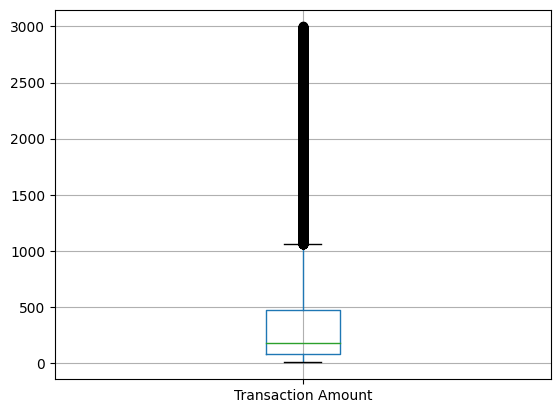

In [23]:
customer_transactions.boxplot()

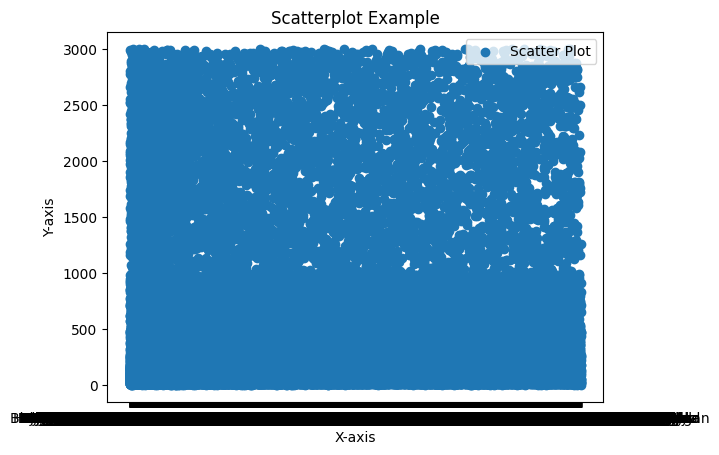

In [24]:
# Sample data
x = customer_transactions['Merchant Name']
y = customer_transactions['Transaction Amount']

# Create a scatterplot
plt.scatter(x, y, label='Scatter Plot')

# Add labels and a title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatterplot Example')

# Add a legend
plt.legend()

# Show the plot
plt.show()


### INSIGHTS TO BE DERIVED FROM THIS ANALYSIS

#### QUESTIONS
 - What is the percentage for the various gender in the gender column? 
 - What is the total amount generated by each category?
 - What is the total amount generated by the various gender in connection to the category?
 - What are the top 3 highest transactions in each category and their merchant names?
 - What are the age ranges of customers who patronize the various categories?
 - What is the trend in the transactions?

#### QUESTION ONE

###### - What is the percentage for the various gender in the gender column? 

In [25]:
#Get the value counts for each gender

customer_transactions['Gender'].value_counts()

Gender
Female       22713
Male         22240
Undefined     5047
Name: count, dtype: int64

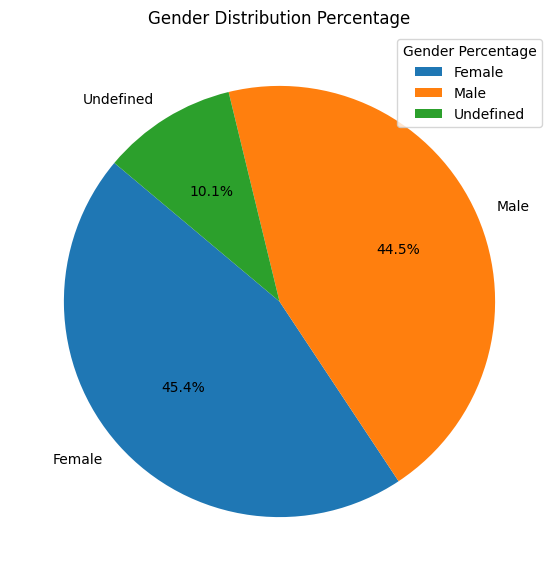

In [26]:
#Plot the above results into a pie chart.

gender_counts = customer_transactions['Gender'].value_counts()

total_count = len(customer_transactions)

gender_percentages = (gender_counts / total_count) * 100


# Create a pie chart
plt.figure(figsize=(7, 7))

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Gender Distribution Percentage')

# Add a legend
plt.legend(gender_percentages.index, title="Gender Percentage")

plt.show()

#### INSIGHTS

There are six (6) categories in this dataset namely, Cosmetic, Travel, Clothing, Electronics, Restaurant and Market.

Below are their outputs / results in descending order:

- Restaurant  - 8413 - 16.8%
- Market      - 8382 - 16.8%
- Travel      - 8377 - 16.8%
- Electronics - 8324 - 16.6%
- Clothing    - 8261 - 16.5%
- Cosmetic    - 8243 - 16.5%

#### QUESTION TWO

###### - What is the total amount generated by each category? 

      Category  Transaction Amount
0     Clothing          1319342.47
1     Cosmetic           876672.44
2  Electronics          4394092.10
3       Market          2151134.42
4   Restaurant           464488.60
5       Travel         12900231.94


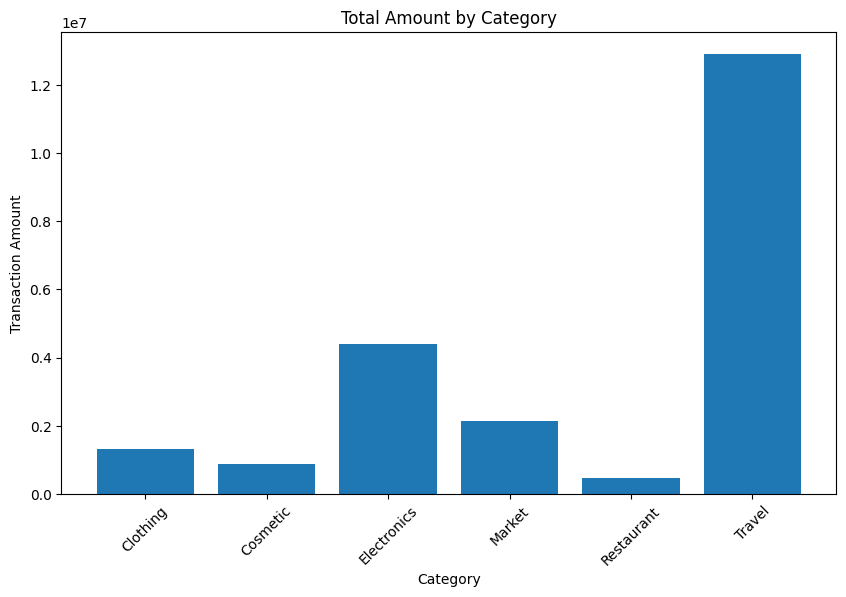

In [27]:
# Calculate the total amount for each category
category_totals = customer_transactions.groupby('Category')['Transaction Amount'].sum().reset_index()

# Display the result
print(category_totals)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_totals['Category'], category_totals['Transaction Amount'])
plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.title('Total Amount by Category')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.show()

#### QUESTION THREE

###### - What is the total amount generated by the various gender in connection to the category?

In [28]:
gender_category_totals = customer_transactions.groupby(['Gender', 'Category'])['Transaction Amount'].sum().reset_index()
gender_category_totals 

,Gender,Category,Transaction Amount
0,Female,Clothing,587938.88
1,Female,Cosmetic,407487.58
2,Female,Electronics,1977312.00
3,Female,Market,959849.62
4,Female,Restaurant,211185.65
5,Female,Travel,5975346.51
6,Male,Clothing,594994.60
7,Male,Cosmetic,383398.72
8,Male,Electronics,1994008.68
9,Male,Market,960420.88


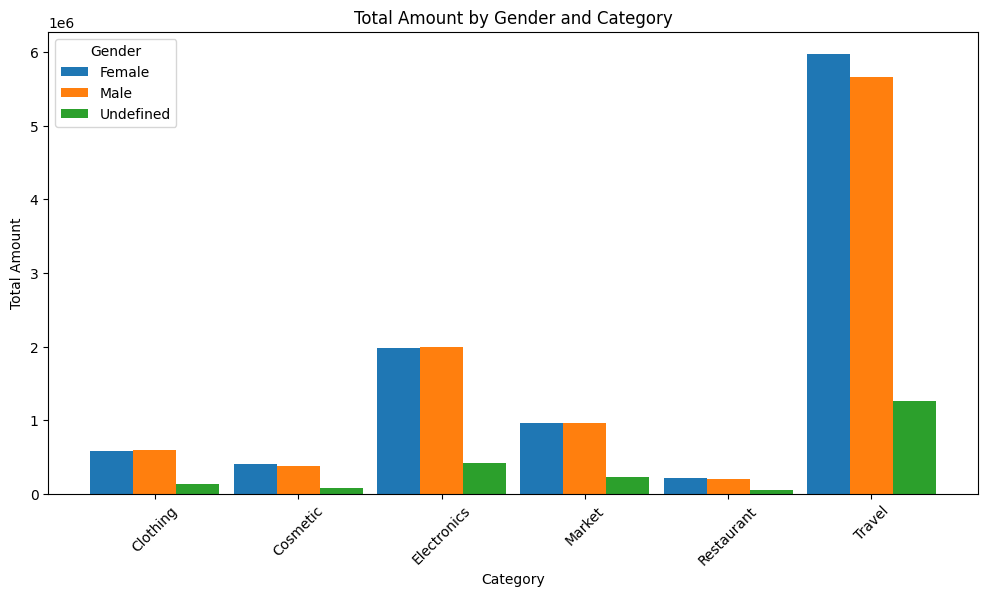

In [35]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Grouped bar chart
category_names = gender_category_totals['Category'].unique()
width = 0.30
x = range(len(category_names))

for i, gender in enumerate(gender_category_totals['Gender'].unique()):
    gender_data = gender_category_totals[gender_category_totals['Gender'] == gender]
    amounts = gender_data['Transaction Amount']
    plt.bar([pos + i * width for pos in x], amounts, width, label=gender)

plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.title('Total Amount by Gender and Category')
plt.xticks([pos + width for pos in x], category_names)
plt.legend(title='Gender')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.show()

#### QUESTION FOUR

###### - What are the top 3 highest transactions in each category and their merchant names.

In [31]:

customer_transactions = pd.DataFrame(customer_transactions)

# Find the top 3 highest transactions in each category
result = customer_transactions.groupby('Category').apply(lambda x: x.nlargest(3, 'Transaction Amount'))[['Merchant Name', 'Category', 'Transaction Amount']].reset_index(drop=True)

print(result)


                   Merchant Name     Category  Transaction Amount
0                Faulkner-Torres     Clothing              299.97
1                   Johnson-Webb     Clothing              299.95
2                        Fox Inc     Clothing              299.90
3                      Owens Ltd     Cosmetic              199.97
4                Faulkner-Graham     Cosmetic              199.96
5                    Ramirez PLC     Cosmetic              199.96
6                    Myers Group  Electronics              999.96
7   Martinez, Elliott and Melton  Electronics              999.95
8      Sanders, Massey and Jones  Electronics              999.87
9          Mack, Bush and Bailey       Market              499.95
10                     Kim-Jones       Market              499.83
11                    Warner Inc       Market              499.73
12                Ortiz-Williams   Restaurant              100.00
13                Barnes-Stevens   Restaurant               99.99
14        

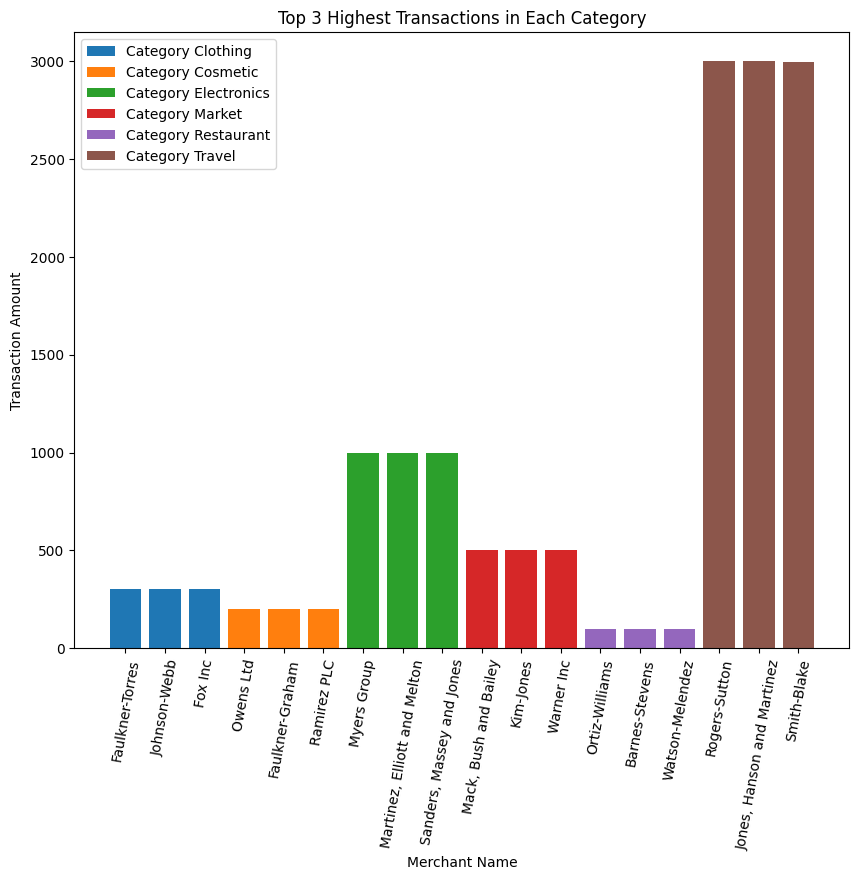

In [32]:
# Create a bar plot
plt.figure(figsize=(10, 8))
for category, group in result.groupby('Category'):
    plt.bar(group['Merchant Name'], group['Transaction Amount'], label=f'Category {category}')

# Add labels and a title
plt.xlabel('Merchant Name')

plt.ylabel('Transaction Amount')

plt.title('Top 3 Highest Transactions in Each Category')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=80)

plt.legend()

plt.show()

#### QUESTION FIVE

###### - Which date had the highest transactions.

In [ ]:
customer_transactions['Date'] = pd.to_datetime(customer_transactions['Date'])

In [ ]:
customer_transactions.set_index('Date', inplace=True)

In [ ]:
date_min = customer_transactions['Date'].min()
date_max = customer_transactions['Date'].max()

In [ ]:
print(f"Start Date: {date_min}")
print(f"End Date: {date_max}")

In [ ]:
resampled_data = customer_transactions.resample('D').sum()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(resampled_data.index, resampled_data['Transaction Amount'], marker='o')
plt.title('Transaction Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()

In [ ]:
max_transaction_date = resampled_data.idxmax()
max_transaction_count = resampled_data.max()

print("Date with the highest transaction count:", max_transaction_date['TransactionCount'])
print("Highest transaction count:", max_transaction_count['TransactionCount'])


In [ ]:
#ax = sns.countplot(customer_transactions, x='Gender')

#for bars in ax.containers:
    
      #ax.bar_label(bars)
        
#plt.title('Distribution of Gender')

#plt.ylabel('Gender Count')

#plt.show()

In [ ]:
#gender_counts = customer_transactions['Gender'].value_counts()

# Create a pie chart
#plt.figure(figsize=(6, 6))
#plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title and legend
#plt.title('Percentage of Gender Column')
#plt.legend(gender_counts.index, loc='upper right', bbox_to_anchor=(1.2, 1))

# Show the pie chart
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.show()

#### SHOW A SUMMARY STATISTICS OF THE AGE GROUP IN THE DATASET

In [34]:
summary_stats = customer_transactions['Date of Birth'].describe()
print(summary_stats)

count                            50000
mean     1977-04-27 06:55:17.759999968
min                1948-11-02 00:00:00
25%                1962-10-30 00:00:00
50%                1976-10-26 00:00:00
75%                1991-10-23 00:00:00
max                2005-10-19 00:00:00
Name: Date of Birth, dtype: object


#### CONVERT THE BIRTHDATE INTO A DATETIME TO PLOT IT OUT AS A GRAPH

In [ ]:
# Convert 'Birthdate' to datetime
customer_transactions['Date of Birth'] = pd.to_datetime(customer_transactions['Date of Birth'])

# Calculate age
current_date = pd.Timestamp.now()

customer_transactions['Age'] = (current_date - customer_transactions['Date of Birth']).dt.days // 365  # Calculate age in years

# Define age bins and labels
age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 100]

age_labels = ['21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90', '91-95']

# Apply age grouping
customer_transactions['AgeGroup'] = pd.cut(customer_transactions['Age'], bins=age_bins, labels=age_labels, right=False)

# Histogram
plt.figure(figsize=(10, 8))

sns.histplot(data=customer_transactions, x='AgeGroup', kde=True)

plt.title('Age Distribution')

plt.xlabel('Age Group')

plt.ylabel('Frequency')

plt.show()

In [ ]:
cross_tab = pd.crosstab(customer_transactions['Category'], customer_transactions['AgeGroup'])

# Create a heatmap to visualize the cross-tabulation
plt.figure(figsize=(15, 8))

sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', cbar=True)

plt.title('Bivariate Analysis: Age Group vs. Category')

plt.xlabel('Category')

plt.ylabel('Age Group')

plt.show()

In [33]:
customer_transactions = pd.DataFrame(customer_transactions)

# Convert the 'Date of Birth' column to datetime
customer_transactions['Date of Birth'] = pd.to_datetime(customer_transactions['Date of Birth'])

# Calculate age based on the current date
current_date = datetime.now()
customer_transactions['Age'] = (current_date - customer_transactions['Date of Birth']) // pd.Timedelta(days=365)

customer_transactions

,First Name,Gender,Date of Birth,Transaction Amount,Date,Merchant Name,Category,Age
0,Sean,Female,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,21
1,Michelle,Undefined,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel,38
2,Jacob,Male,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,42
3,Nathan,Male,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,46
4,Crystal,Female,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,72
...,...,...,...,...,...,...,...,...
49995,Christine,Female,1997-10-21,108.74,2023-08-30,Alexander Ltd,Market,26
49996,Anna,Female,1999-10-21,133.66,2023-05-03,Knapp-Calhoun,Cosmetic,24
49997,Nicole,Male,1979-10-26,464.29,2023-02-12,"Cantrell, Haynes and Ballard",Market,44
49998,Maria,Male,1981-10-25,472.57,2023-03-25,"Wilson, Jackson and Beard",Market,42
